In [1]:
import pandas as pd
import geopandas as gpd
from dateutil.parser import parse 
import mapclassify
import pysal
import matplotlib.pyplot as plt
from geosnap import DataStore
from geosnap.io import get_lodes

/opt/tljh/user/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/tljh/user/lib/python3.10/site-packages/quantecon/lss.py:20: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def simulate_linear_model(A, x0, v, ts_length):


In [2]:
datasets = DataStore("/srv/data/geosnap")

In [3]:
lodes = get_lodes(datasets, county_fips='06073', years=[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [4]:
lodes.columns

Index(['geoid', 'year', 'CFA01', 'CFA02', 'CFA03', 'CFA04', 'CFA05', 'CFS01',
       'CFS02', 'CFS03', 'CFS04', 'CFS05', 'aland20', 'awater20',
       'create_date', 'earnings_1251_3333', 'earnings_over_3333',
       'earnings_under_1250', 'education_bachelors', 'education_hs',
       'education_lths', 'education_some_college', 'employees_30_54',
       'employees_55plus', 'employees_asian', 'employees_black',
       'employees_female', 'employees_hawaiian_pi', 'employees_hispanic',
       'employees_male', 'employees_native_american', 'employees_not_hispanic',
       'employees_twoplus_races', 'employees_under_30', 'employees_white',
       'geometry', 'housing_units', 'naics_11', 'naics_21', 'naics_22',
       'naics_23', 'naics_31_33', 'naics_42', 'naics_44_45', 'naics_48_49',
       'naics_51', 'naics_52', 'naics_53', 'naics_54', 'naics_55', 'naics_56',
       'naics_61', 'naics_62', 'naics_71', 'naics_72', 'naics_81', 'naics_92',
       'population', 'total_employees'],
      dtyp

In [5]:
years = [2006, 2011, 2016, 2021]

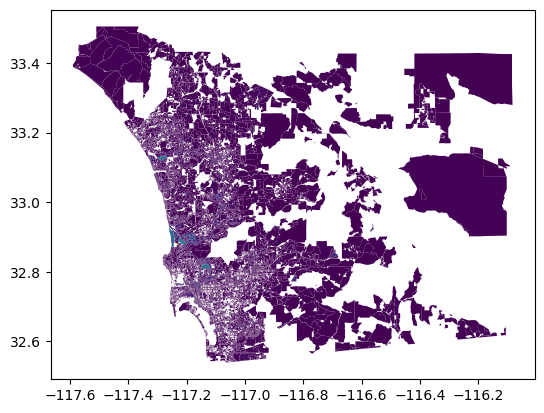

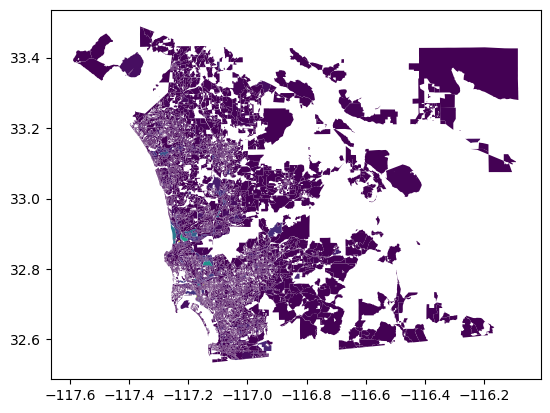

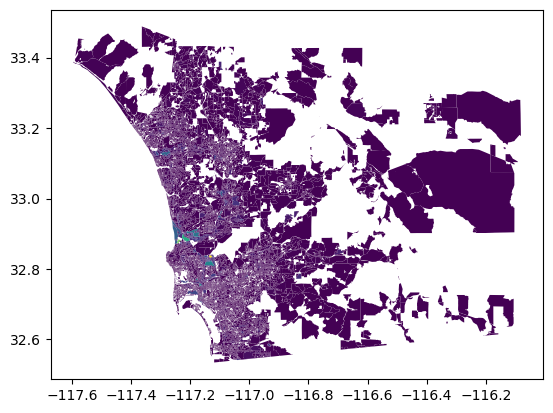

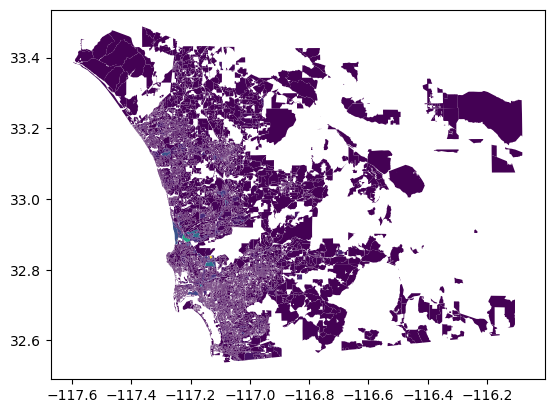

In [6]:
for i in years:
    lodes[lodes['year']==i].plot(column='total_employees')

In [7]:
ec_lodes = lodes[lodes['total_employees'] > 4000]

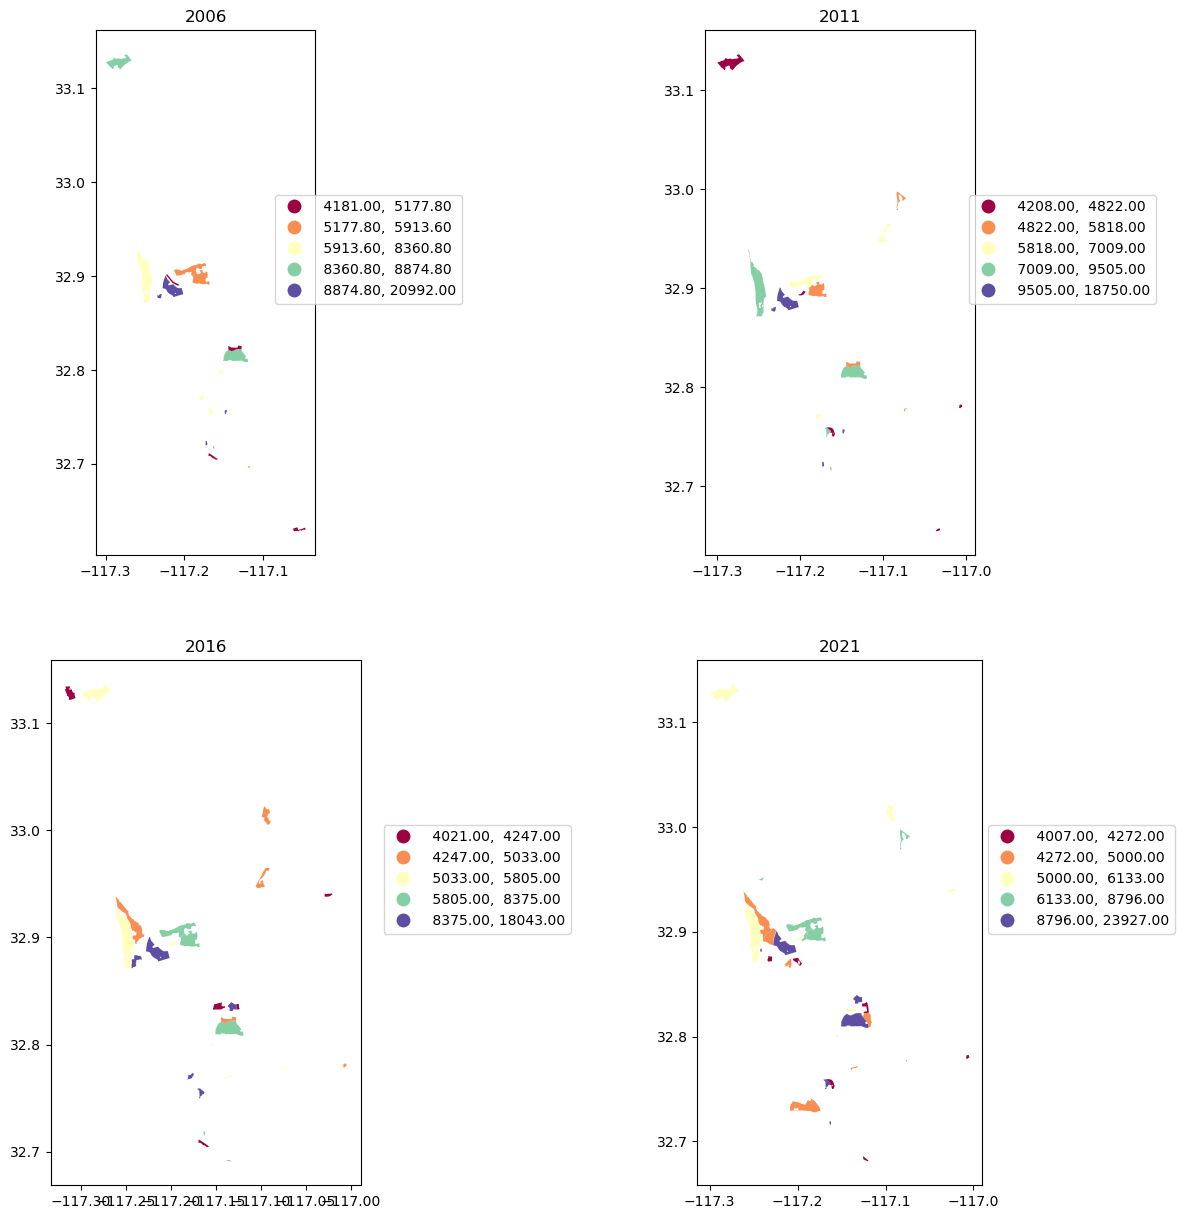

In [8]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

axs=axs.flatten()

for i in range(4):
    ax = axs[i]
    year=years[i]
    ec_lodes[ec_lodes['year']==year].plot(column = 'total_employees', ax=ax, scheme='Quantiles',
                       k=5, cmap='Spectral', legend=True,
                       legend_kwds={'bbox_to_anchor': (1.7, 0.7), "fmt": "{:.2f}"})
    ax.set_title(years[i])

In [9]:
geoid_list = ec_lodes['geoid'].unique()

In [10]:
geoid_list

array(['060730004002000', '060730004004000', '060730006001000',
       '060730028011010', '060730028012006', '060730028012008',
       '060730035021003', '060730035022005', '060730035023011',
       '060730038001018', '060730050001059', '060730053021009',
       '060730054011000', '060730054031007', '060730058021007',
       '060730062001000', '060730076011041', '060730083051007',
       '060730083051012', '060730083051016', '060730083051018',
       '060730083121001', '060730083391005', '060730083391018',
       '060730083391031', '060730083391034', '060730083462000',
       '060730083462024', '060730083501024', '060730083502006',
       '060730083692001', '060730083692007', '060730083732006',
       '060730083762000', '060730083763000', '060730085111005',
       '060730085111010', '060730085111015', '060730085112003',
       '060730085113001', '060730085113004', '060730085113006',
       '060730085113008', '060730087021003', '060730087021005',
       '060730089013007', '0607300890220

In [11]:
ec_lodes[['geoid', 'year', 'total_employees']].head(8)

,geoid,year,total_employees
3424,060730004002000,2006,5984.0
3425,060730004002000,2007,5673.0
3426,060730004002000,2008,5920.0
3427,060730004002000,2009,6163.0
3428,060730004002000,2010,6661.0
3429,060730004002000,2011,7107.0
3430,060730004002000,2012,7426.0
3431,060730004002000,2013,7428.0


In [12]:
ec_lodes['percent_change'] = ec_lodes.groupby('geoid')['total_employees'].pct_change()

ec_lodes.head()

/opt/tljh/user/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,geoid,year,CFA01,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,...,naics_56,naics_61,naics_62,naics_71,naics_72,naics_81,naics_92,population,total_employees,percent_change
3424,060730004002000,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,3.0,5696.0,0.0,45.0,151.0,0.0,121,5984.0,NaN
3425,060730004002000,2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,2.0,5468.0,4.0,46.0,52.0,0.0,121,5673.0,-0.051972
3426,060730004002000,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,34.0,5694.0,2.0,34.0,59.0,5.0,121,5920.0,0.043540
3427,060730004002000,2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,5.0,6002.0,1.0,1.0,50.0,0.0,121,6163.0,0.041047
3428,060730004002000,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,2.0,6329.0,4.0,3.0,60.0,7.0,121,6661.0,0.080805


In [13]:
ec_lodes = ec_lodes.fillna(0)

/opt/tljh/user/lib/python3.10/site-packages/mapclassify/classifiers.py:1592: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 1.
  self.bins = quantile(y, k=k)


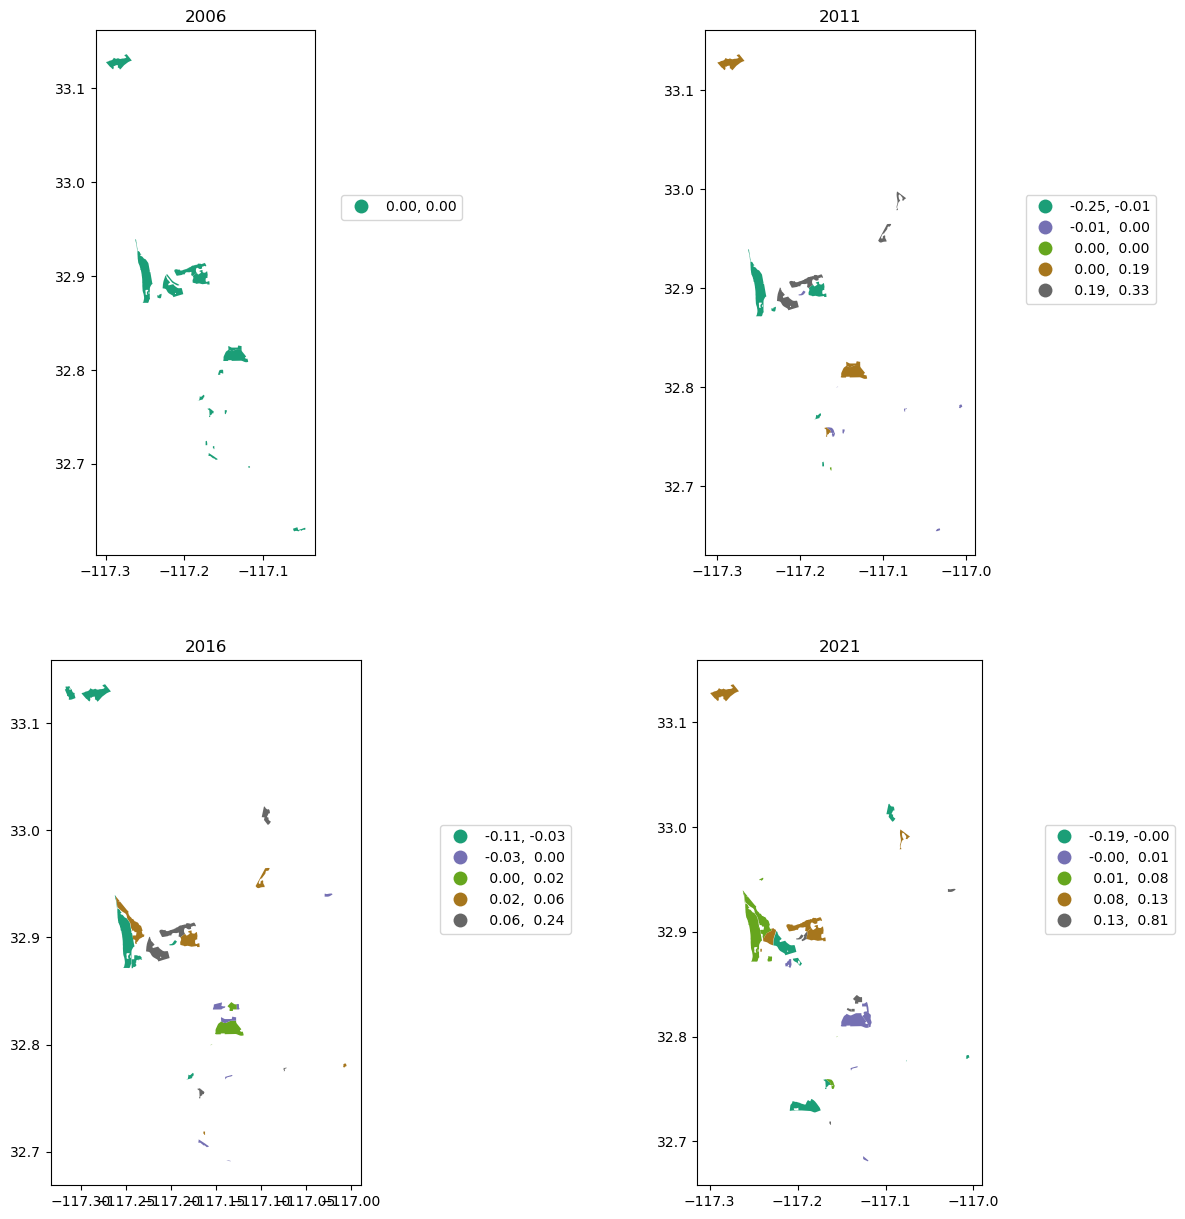

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

axs=axs.flatten()

for i in range(4):
    ax = axs[i]
    year=years[i]
    ec_lodes[ec_lodes['year']==year].plot(column = 'percent_change', ax=ax, scheme='Quantiles',
                       k=5, cmap='Dark2', legend=True,
                       legend_kwds={'bbox_to_anchor': (1.7, 0.7), "fmt": "{:.2f}"})
    ax.set_title(years[i])

In [15]:
ec_lodes.head(8)

,geoid,year,CFA01,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,...,naics_56,naics_61,naics_62,naics_71,naics_72,naics_81,naics_92,population,total_employees,percent_change
3424,060730004002000,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27.0,3.0,5696.0,0.0,45.0,151.0,0.0,121,5984.0,0.000000
3425,060730004002000,2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,2.0,5468.0,4.0,46.0,52.0,0.0,121,5673.0,-0.051972
3426,060730004002000,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,34.0,5694.0,2.0,34.0,59.0,5.0,121,5920.0,0.043540
3427,060730004002000,2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,5.0,6002.0,1.0,1.0,50.0,0.0,121,6163.0,0.041047
3428,060730004002000,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22.0,2.0,6329.0,4.0,3.0,60.0,7.0,121,6661.0,0.080805
3429,060730004002000,2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.0,6.0,6887.0,4.0,8.0,55.0,35.0,121,7107.0,0.066957
3430,060730004002000,2012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.0,16.0,7119.0,2.0,11.0,47.0,5.0,121,7426.0,0.044885
3431,060730004002000,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,40.0,15.0,7138.0,1.0,18.0,54.0,0.0,121,7428.0,0.000269


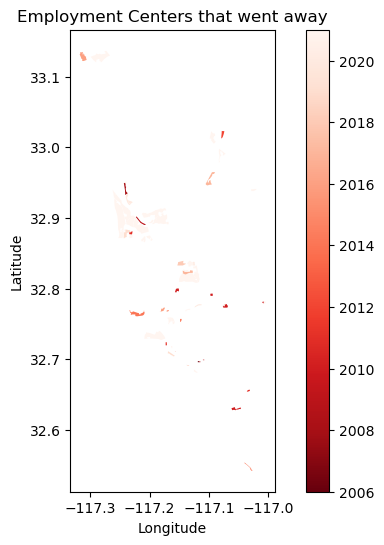

In [16]:
latest_years = ec_lodes.groupby('geoid')['year'].max().reset_index()

ec_lodes_latest = ec_lodes.merge(latest_years, on=['geoid', 'year'], how='inner')

fig, ax = plt.subplots(figsize=(8, 6))
ec_lodes_latest.plot(column='year', ax=ax, legend=True, cmap='Reds_r')
plt.title('Employment Centers that went away')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

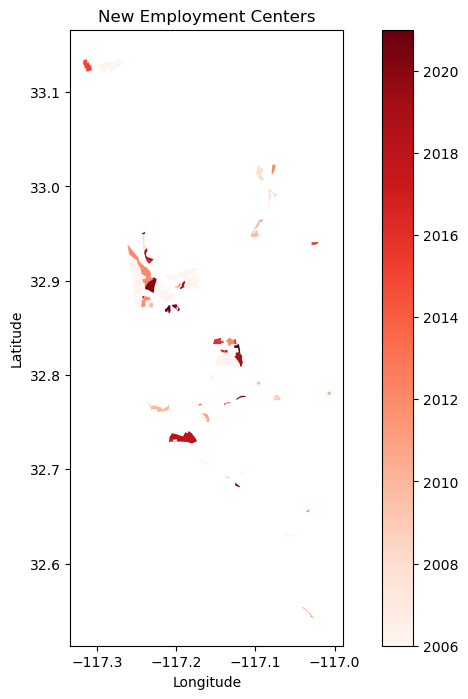

In [17]:
earliest_years = ec_lodes.groupby('geoid')['year'].min().reset_index()

ec_lodes_earliest = ec_lodes.merge(earliest_years, on=['geoid', 'year'], how='inner')

fig, ax = plt.subplots(figsize=(10, 8))
ec_lodes_earliest.plot(column='year', ax=ax, legend=True, cmap='Reds')
plt.title('New Employment Centers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [18]:
ec_lodes.explore()

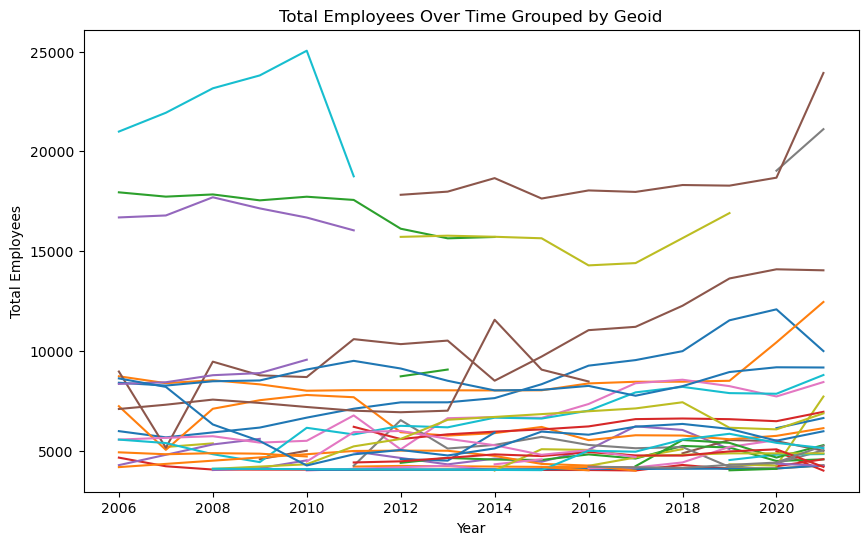

In [19]:
plt.figure(figsize=(10, 6))
for geoid, group_data in ec_lodes.groupby('geoid'):
    plt.plot(group_data['year'], group_data['total_employees'], label=geoid)

plt.xlabel('Year')
plt.ylabel('Total Employees')
plt.title('Total Employees Over Time Grouped by Geoid')
plt.show()

In [20]:
averages = lodes.groupby('year')[['total_employees', 'population']].mean()

# Calculate the difference between the averages of 'column1' and 'column2' for each year
averages['ratio'] = averages['total_employees']/averages['population']

print(averages)
ec_averages = ec_lodes.groupby('year')[['total_employees', 'population']].mean()

# Calculate the difference between the averages of 'column1' and 'column2' for each year
ec_averages['ratio'] = ec_averages['total_employees']/ec_averages['population']

print(ec_averages)

      total_employees  population     ratio
year                                       
2006        89.920152  115.203926  0.780530
2007        78.125333  115.203926  0.678148
2008        77.638910  115.203926  0.673926
2009        74.008127  115.203926  0.642410
2010        76.343717  115.203926  0.662683
2011        87.590450  115.203926  0.760308
2012        83.885206  115.203926  0.728145
2013        85.830653  115.203926  0.745032
2014        86.862876  115.203926  0.753992
2015        87.476246  115.203926  0.759317
2016        87.898541  115.203926  0.762982
2017        88.612800  115.203926  0.769182
2018        89.405066  115.203926  0.776059
2019        89.064223  115.203926  0.773101
2020        87.250845  115.203926  0.757360
2021        86.430020  115.203926  0.750235
      total_employees  population      ratio
year                                        
2006      8545.555556  234.777778  36.398486
2007      8637.375000  268.000000  32.229011
2008      8012.095238  218.0

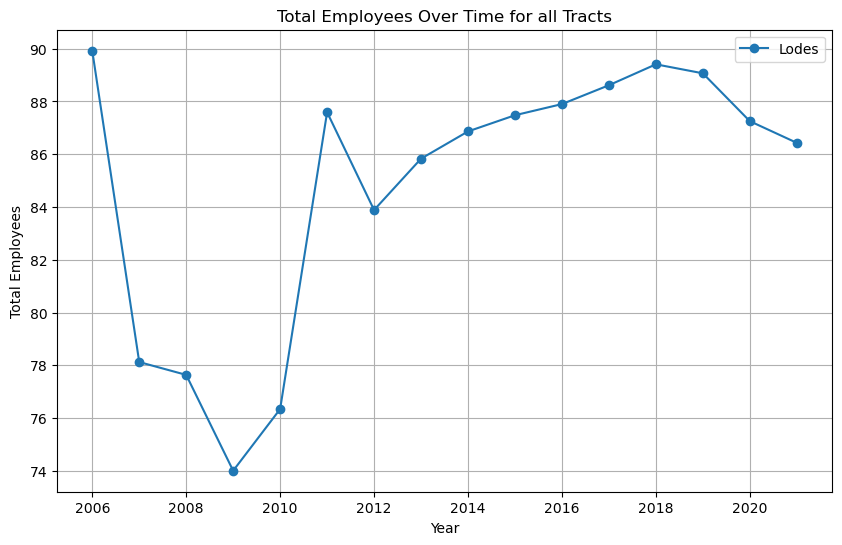

In [21]:

# Plot total employees over time for 'lodes' DataFrame
plt.figure(figsize=(10, 6))
averages['total_employees'].plot(marker='o', linestyle='-', label='Lodes')

# Plot total employees over time for 'ec_lodes' DataFrame

plt.xlabel('Year')
plt.ylabel('Total Employees')
plt.title('Total Employees Over Time for all Tracts')
plt.legend()
plt.grid(True)
plt.show()

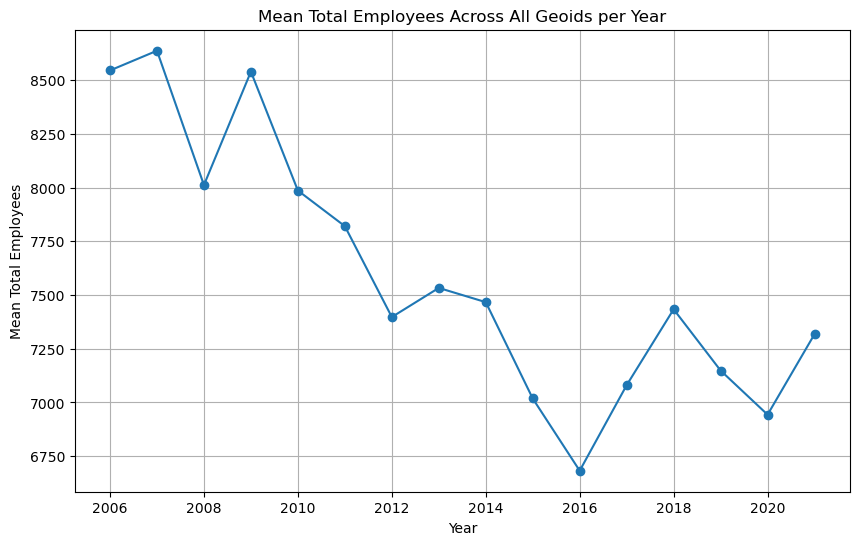

In [22]:
mean_employees_per_year = ec_lodes.groupby('year')['total_employees'].mean()

# Plot the mean total employees across all geoids per year
plt.figure(figsize=(10, 6))
mean_employees_per_year.plot(marker='o', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Mean Total Employees')
plt.title('Mean Total Employees Across All Geoids per Year')
plt.grid(True)
plt.show()

In [23]:
distinct_geoids_per_year = ec_lodes.groupby('year')['geoid'].nunique()

print('Number of Employment Center tracts per year')
print(distinct_geoids_per_year)

Number of Employment Center tracts per year
year
2006    18
2007    16
2008    21
2009    18
2010    21
2011    21
2012    23
2013    22
2014    23
2015    22
2016    26
2017    23
2018    23
2019    26
2020    30
2021    31
Name: geoid, dtype: int64


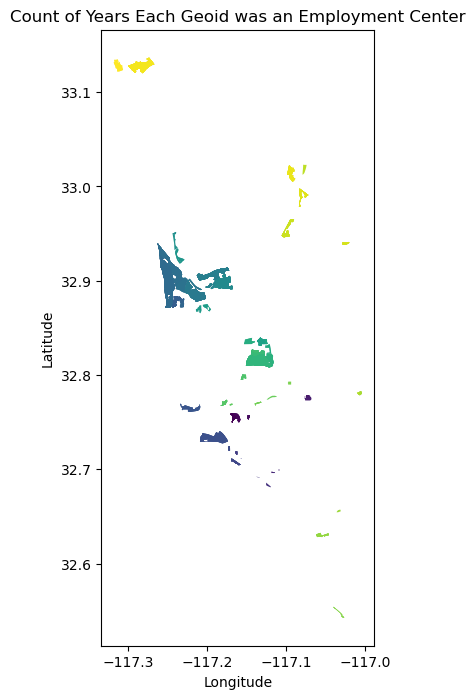

In [24]:
geoid_counts = ec_lodes['geoid'].value_counts()

# Merge the counts back to the ec_lodes DataFrame
ec_lodes_with_counts = ec_lodes.merge(geoid_counts, left_on='geoid', right_index=True)

# Plot the tracts and color them based on the count of years each geoid appears as an employment center
fig, ax = plt.subplots(figsize=(10, 8))
ec_lodes_with_counts.plot(column='geoid', cmap='viridis', ax=ax)
plt.title('Count of Years Each Geoid was an Employment Center')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [25]:
ec_lodes = lodes.rename(columns={
    'naics_11':'agri_for_fish', 
    'naics_21':'oil_gas', 
    'naics_22':'utilities',
    'naics_23':'construction', 
    'naics_31_33':'manufacturing', 
    'naics_42':'wholesale',
    'naics_44_45':'retail', 
    'naics_48_49':'transport', 
    'naics_51':'info',
    'naics_52':'fin_ins', 
    'naics_53':'estate', 
    'naics_54':'pro_sci_tech',
    'naics_55':'mgmt_entrpr', 
    'naics_56':'admin_supp_waste', 
    'naics_61':'edu_services',
    'naics_62':'healthcare_social', 
    'naics_71':'arts_ent_rec', 
    'naics_72':'accom_food',
    'naics_81':'others', 
    'naics_92':'pubadmin'})

In [26]:
ec_lodes.head()

,geoid,year,CFA01,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,...,mgmt_entrpr,admin_supp_waste,edu_services,healthcare_social,arts_ent_rec,accom_food,others,pubadmin,population,total_employees
0,060730001001000,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.0,0.0,3.0,3.0,0.0,293,14.0
1,060730001001000,2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,0.0,3.0,1.0,0.0,293,10.0
2,060730001001000,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,0.0,9.0,2.0,0.0,293,23.0
3,060730001001000,2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,6.0,3.0,0.0,293,20.0
4,060730001001000,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,293,17.0


In [27]:
firms = ['CFA01', 'CFA02', 'CFA03', 'CFA04', 'CFA05',
         'CFS01', 'CFS02', 'CFS03', 'CFS04', 'CFS05']

In [29]:
ec_lodes.head()

,geoid,year,aland20,awater20,create_date,earnings_1251_3333,earnings_over_3333,earnings_under_1250,education_bachelors,education_hs,...,mgmt_entrpr,admin_supp_waste,edu_services,healthcare_social,arts_ent_rec,accom_food,others,pubadmin,population,total_employees
0,060730001001000,2006,319815,0,20230321.0,5.0,3.0,6.0,0.0,0.0,...,0.0,0.0,3.0,1.0,0.0,3.0,3.0,0.0,293,14.0
1,060730001001000,2007,319815,0,20230321.0,1.0,3.0,6.0,0.0,0.0,...,0.0,0.0,2.0,1.0,0.0,3.0,1.0,0.0,293,10.0
2,060730001001000,2008,319815,0,20230321.0,3.0,8.0,12.0,0.0,0.0,...,0.0,0.0,2.0,1.0,0.0,9.0,2.0,0.0,293,23.0
3,060730001001000,2009,319815,0,20230321.0,4.0,6.0,10.0,4.0,4.0,...,0.0,0.0,2.0,0.0,0.0,6.0,3.0,0.0,293,20.0
4,060730001001000,2010,319815,0,20230321.0,2.0,11.0,4.0,9.0,0.0,...,0.0,0.0,3.0,0.0,0.0,2.0,1.0,0.0,293,17.0


In [30]:
industries = ['agri_for_fish', 'oil_gas', 'utilities',
    'construction', 'manufacturing', 'wholesale',
    'retail', 'transport', 'info',
    'fin_ins', 'estate', 'pro_sci_tech',
    'mgmt_entrpr', 'admin_supp_waste', 'edu_services',
    'healthcare_social', 'arts_ent_rec', 'accom_food',
    'others', 'pubadmin' ]